In [1]:
import sympy as sp
import numpy as np

## D in terms of LP

In [2]:
U1, U2, U3, U4, U5, T = sp.symbols(['U1', 'U2', 'U3', 'U4', 'U5', 'T'])
xi1, xi2, xi3, xi4 = sp.symbols(['xi1', 'xi2', 'xi3', 'xi4'])

Gamma0 = sp.Matrix([
    [U1, U4, 0],
    [U4, U1, 0],
    [0, 0, U5]
])

Gamma1 = sp.Matrix([
    [U2, 0, 0],
    [0, -U2, 0],
    [0, 0, 0]
])

Gamma2 = sp.Matrix([
    [0, 0, U2/2],
    [0, 0, U2/2],
    [U2/2, U2/2, 0]
])

Gamma3 = sp.Matrix([
    [U3, -U3, 0],
    [-U3, U3, 0],
    [0, 0, -U3]
])

Gamma4 = sp.Matrix([
    [0, 0, U3],
    [0, 0, -U3],
    [U3, -U3, 0]
])

In [3]:
xiD = [xi1, xi2, xi3, xi4]
D = (T**3/12) * (Gamma0 
                     + Gamma1*xiD[0] 
                     + Gamma2*xiD[1] 
                     + Gamma3*xiD[2] 
                     + Gamma4*xiD[3])
D


Matrix([
[T**3*(U1 + U2*xi1 + U3*xi3)/12,         T**3*(-U3*xi3 + U4)/12, T**3*(U2*xi2/2 + U3*xi4)/12],
[        T**3*(-U3*xi3 + U4)/12, T**3*(U1 - U2*xi1 + U3*xi3)/12, T**3*(U2*xi2/2 - U3*xi4)/12],
[   T**3*(U2*xi2/2 + U3*xi4)/12,    T**3*(U2*xi2/2 - U3*xi4)/12,      T**3*(-U3*xi3 + U5)/12]])

In [5]:
print(D[0,0])
print(D[0,1])
print(D[0,2])
print(D[1,0])
print(D[1,1])
print(D[1,2])
print(D[2,0])
print(D[2,1])
print(D[2,2])

T**3*(U1 + U2*xi1 + U3*xi3)/12
T**3*(-U3*xi3 + U4)/12
T**3*(U2*xi2/2 + U3*xi4)/12
T**3*(-U3*xi3 + U4)/12
T**3*(U1 - U2*xi1 + U3*xi3)/12
T**3*(U2*xi2/2 - U3*xi4)/12
T**3*(U2*xi2/2 + U3*xi4)/12
T**3*(U2*xi2/2 - U3*xi4)/12
T**3*(-U3*xi3 + U5)/12


## Uniaxial buckling

In [5]:
a, b, m, n = sp.symbols(['a', 'b', 'm', 'n'])

In [6]:
AR = a/b

Nxcr = (sp.pi**2/(a**2*m**2) 
        * (D[0,0]*m**4
        + 2*(D[0,1]+2*D[2,2])*m**2*n**2*AR**2
        + D[1,1]*n**4*AR**4)      
        )
Nxcr

pi**2*(T**3*a**4*n**4*(U1 - U2*xi1 + U3*xi3)/(12*b**4) + T**3*m**4*(U1 + U2*xi1 + U3*xi3)/12 + a**2*m**2*n**2*(T**3*(-U3*xi3 + U4)/6 + T**3*(-U3*xi3 + U5)/3)/b**2)/(a**2*m**2)

In [7]:
print(Nxcr)

pi**2*(T**3*a**4*n**4*(U1 - U2*xi1 + U3*xi3)/(12*b**4) + T**3*m**4*(U1 + U2*xi1 + U3*xi3)/12 + a**2*m**2*n**2*(T**3*(-U3*xi3 + U4)/6 + T**3*(-U3*xi3 + U5)/3)/b**2)/(a**2*m**2)


## LP restriction

In [8]:
g1 = xi3 - 2*xi1**2 + 1 
g2 = xi3 - 1

## Lagrangean

See optimization exercise 2 as an example

In [9]:
from symopt import DiffNotation

In [10]:
v1, v2 = sp.symbols(['v1', 'v2'])

In [11]:
L = Nxcr + v1*g1 + v2*g2
L

v1*(-2*xi1**2 + xi3 + 1) + v2*(xi3 - 1) + pi**2*(T**3*a**4*n**4*(U1 - U2*xi1 + U3*xi3)/(12*b**4) + T**3*m**4*(U1 + U2*xi1 + U3*xi3)/12 + a**2*m**2*n**2*(T**3*(-U3*xi3 + U4)/6 + T**3*(-U3*xi3 + U5)/3)/b**2)/(a**2*m**2)

In [12]:
L_dn = DiffNotation(L, xi1, xi3, v1, v2)
grad_L = L_dn.gradient()
grad_L

Matrix([
[                               -4*v1*xi1 + pi**2*(-T**3*U2*a**4*n**4/(12*b**4) + T**3*U2*m**4/12)/(a**2*m**2)],
[v1 + v2 + pi**2*(T**3*U3*a**4*n**4/(12*b**4) - T**3*U3*a**2*m**2*n**2/(2*b**2) + T**3*U3*m**4/12)/(a**2*m**2)],
[                                                                                          -2*xi1**2 + xi3 + 1],
[                                                                                                      xi3 - 1]])

## KKT

In [13]:
# case 1 
# g1, g2 = 0

case1 = grad_L
case1

Matrix([
[                               -4*v1*xi1 + pi**2*(-T**3*U2*a**4*n**4/(12*b**4) + T**3*U2*m**4/12)/(a**2*m**2)],
[v1 + v2 + pi**2*(T**3*U3*a**4*n**4/(12*b**4) - T**3*U3*a**2*m**2*n**2/(2*b**2) + T**3*U3*m**4/12)/(a**2*m**2)],
[                                                                                          -2*xi1**2 + xi3 + 1],
[                                                                                                      xi3 - 1]])

In [14]:
sp.nonlinsolve(case1, (xi1, xi3, v1, v2))

{(-1, 1, pi**2*T**3*U2*(a*n - b*m)*(a*n + b*m)*(a**2*n**2 + b**2*m**2)/(48*a**2*b**4*m**2), (-pi**2*T**3*U2*a**4*n**4 + pi**2*T**3*U2*b**4*m**4 - 4*pi**2*T**3*U3*a**4*n**4 + 24*pi**2*T**3*U3*a**2*b**2*m**2*n**2 - 4*pi**2*T**3*U3*b**4*m**4)/(48*a**2*b**4*m**2)), (1, 1, -pi**2*T**3*U2*(a*n - b*m)*(a*n + b*m)*(a**2*n**2 + b**2*m**2)/(48*a**2*b**4*m**2), (pi**2*T**3*U2*a**4*n**4 - pi**2*T**3*U2*b**4*m**4 - 4*pi**2*T**3*U3*a**4*n**4 + 24*pi**2*T**3*U3*a**2*b**2*m**2*n**2 - 4*pi**2*T**3*U3*b**4*m**4)/(48*a**2*b**4*m**2))}

In [15]:
# case 2
# v1, g2 = 0

case2 = grad_L.subs(v1, 0)
case2 = sp.Matrix([
    [case2[0]],
    [case2[1]],
    [case2[3]]
])
case2

Matrix([
[                                      pi**2*(-T**3*U2*a**4*n**4/(12*b**4) + T**3*U2*m**4/12)/(a**2*m**2)],
[v2 + pi**2*(T**3*U3*a**4*n**4/(12*b**4) - T**3*U3*a**2*m**2*n**2/(2*b**2) + T**3*U3*m**4/12)/(a**2*m**2)],
[                                                                                                 xi3 - 1]])

In [16]:
sp.nonlinsolve(case2, (xi1, xi3, v2))

EmptySet

In [17]:
# case 3
# g1, v2 = 0

case3 = grad_L.subs(v2, 0)
case3 = sp.Matrix([
    [case3[0]],
    [case3[1]],
    [case3[2]]
])
case3

Matrix([
[                          -4*v1*xi1 + pi**2*(-T**3*U2*a**4*n**4/(12*b**4) + T**3*U2*m**4/12)/(a**2*m**2)],
[v1 + pi**2*(T**3*U3*a**4*n**4/(12*b**4) - T**3*U3*a**2*m**2*n**2/(2*b**2) + T**3*U3*m**4/12)/(a**2*m**2)],
[                                                                                     -2*xi1**2 + xi3 + 1]])

In [18]:
case3_sol = sp.nonlinsolve(case3, (xi1, xi3, v1))
case3_sol

{(U2*(a*n - b*m)*(a*n + b*m)*(a**2*n**2 + b**2*m**2)/(4*U3*(a**2*n**2 - 2*a*b*m*n - b**2*m**2)*(a**2*n**2 + 2*a*b*m*n - b**2*m**2)), (U2**2*a**8*n**8 - 2*U2**2*a**4*b**4*m**4*n**4 + U2**2*b**8*m**8 - 8*U3**2*a**8*n**8 + 96*U3**2*a**6*b**2*m**2*n**6 - 304*U3**2*a**4*b**4*m**4*n**4 + 96*U3**2*a**2*b**6*m**6*n**2 - 8*U3**2*b**8*m**8)/(8*U3**2*(a**2*n**2 - 2*a*b*m*n - b**2*m**2)**2*(a**2*n**2 + 2*a*b*m*n - b**2*m**2)**2), -pi**2*T**3*U3*(a**2*n**2 - 2*a*b*m*n - b**2*m**2)*(a**2*n**2 + 2*a*b*m*n - b**2*m**2)/(12*a**2*b**4*m**2))}

In [19]:
list(case3_sol)[0][1]

(U2**2*a**8*n**8 - 2*U2**2*a**4*b**4*m**4*n**4 + U2**2*b**8*m**8 - 8*U3**2*a**8*n**8 + 96*U3**2*a**6*b**2*m**2*n**6 - 304*U3**2*a**4*b**4*m**4*n**4 + 96*U3**2*a**2*b**6*m**6*n**2 - 8*U3**2*b**8*m**8)/(8*U3**2*(a**2*n**2 - 2*a*b*m*n - b**2*m**2)**2*(a**2*n**2 + 2*a*b*m*n - b**2*m**2)**2)

In [20]:
xi1_opt = list(case3_sol)[0][0]
xi3_opt = list(case3_sol)[0][1]

In [21]:
# case 4
# v1, v2 = 0

case4 = grad_L.subs(v1, 0).subs(v2, 0)
case4 = sp.Matrix([
    [case4[0]],
    [case4[1]]
])
case4

Matrix([
[                                 pi**2*(-T**3*U2*a**4*n**4/(12*b**4) + T**3*U2*m**4/12)/(a**2*m**2)],
[pi**2*(T**3*U3*a**4*n**4/(12*b**4) - T**3*U3*a**2*m**2*n**2/(2*b**2) + T**3*U3*m**4/12)/(a**2*m**2)]])

In [22]:
sp.nonlinsolve(case4, (xi1, xi3))

EmptySet

## Material properties and invariant

In [23]:
from composipy import OrthotropicMaterial, LaminateProperty

In [24]:
# plate dim
a_val = 200.
b_val = 200.
T_val = 1.

# buck mode
m_val =1
n_val = 1

In [25]:
E1 = 6000000.
E2 = 60000.
v12 = 0.07
G12 = 4550
t = 0.21 # Not used

mat1 = OrthotropicMaterial(E1, E2, v12, G12, t)

In [26]:
mat1.Q_0

array([[6.00029401e+06, 4.20020581e+03, 0.00000000e+00],
       [4.20020581e+03, 6.00029401e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.55000000e+03]])

In [27]:
Q11 = mat1.Q_0[0, 0]
Q12 = mat1.Q_0[0, 1]
Q22 = mat1.Q_0[1, 1]
Q66 = mat1.Q_0[2, 2]

U1_val = 1/8 * (3*Q11 + 3*Q22 + 2*Q12 + 4*Q66)
U2_val = 1/2 * (Q11 - Q22)
U3_val = 1/8 * (Q11 + Q22 - 2*Q12 - 4*Q66)
U4_val = 1/8 * (Q11 + Q22 + 6*Q12 - 4*Q66)
U5_val = 1/8 * (Q11 + Q22 - 2*Q12 + 4*Q66)


## Plot

In [28]:
import matplotlib.pyplot as plt

In [29]:
# data for contour plot
x = np.linspace(-1.5, 1.5, 200)
xi1_arr, xi3_arr = np.meshgrid(x, x)
Nx_arr = [[
    Nxcr.subs(
    {
    U1: U1_val,
    U2: U2_val, 
    U3: U3_val, 
    U4: U4_val,
    U5: U5_val,
    a: a_val, 
    b: b_val,
    T: T_val,
    m: m_val,
    n: n_val,
    xi1: xi1_,
    xi3: xi3_
    }
    ) for xi1_ in x] for xi3_ in x]


In [30]:
Nxcr.subs(
{
U1: U1_val,
U2: U2_val, 
U3: U3_val, 
U4: U4_val,
U5: U5_val,
a: a_val, 
b: b_val,
T: T_val,
m: m_val,
n: n_val,
})

2.5e-5*pi**2*(758645.46980302 - 251404.022622108*xi3)

In [31]:
# restriction curve g1
g1_xi1 = np.linspace(-1, 1, 100)
g1_xi3 = 2*g1_xi1**2 - 1

In [32]:
sp.solve(g1, xi3)
g1

-2*xi1**2 + xi3 + 1

In [33]:
xi1_opt_val = xi1_opt.subs({
    U1: U1_val,
    U2: U2_val, 
    U3: U3_val, 
    U4: U4_val,
    U5: U5_val,
    a: a_val, 
    b: b_val,
    T: T_val,
    m: m_val,
    n: n_val})
xi1_opt_val

0

In [38]:
print(xi3_opt)

(U2**2*a**8*n**8 - 2*U2**2*a**4*b**4*m**4*n**4 + U2**2*b**8*m**8 - 8*U3**2*a**8*n**8 + 96*U3**2*a**6*b**2*m**2*n**6 - 304*U3**2*a**4*b**4*m**4*n**4 + 96*U3**2*a**2*b**6*m**6*n**2 - 8*U3**2*b**8*m**8)/(8*U3**2*(a**2*n**2 - 2*a*b*m*n - b**2*m**2)**2*(a**2*n**2 + 2*a*b*m*n - b**2*m**2)**2)


In [34]:
xi3_opt_val = xi3_opt.subs({
    U1: U1_val,
    U2: U2_val, 
    U3: U3_val, 
    U4: U4_val,
    U5: U5_val,
    a: a_val, 
    b: b_val,
    T: T_val,
    m: m_val,
    n: n_val})
xi3_opt_val

-1.00000000000000

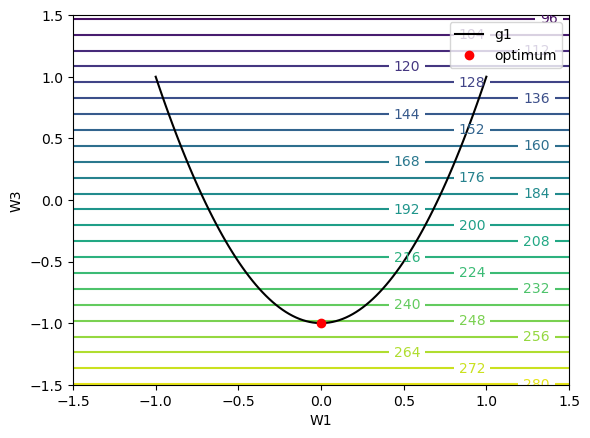

In [35]:
plt.figure()

# Nxcrit
cs1 = plt.contour(xi1_arr, xi3_arr, Nx_arr, 25)
plt.clabel(cs1)

#g1
plt.plot(g1_xi1, g1_xi3, 'k', label='g1')

# optimum
plt.plot(xi1_opt_val, xi3_opt_val, 'ro', label='optimum')


plt.xlabel('W1')
plt.ylabel('W3')
plt.legend()
plt.show()